# Converting axion exclusions to *polarized* hidden photon exclusions requires having the 90% confidence limit value of the square of the time-averaged dot product between {the axis of the haloscope cavity} and {the polarization of the hidden photon}.

## Let's call this value $\langle\cos^2\theta\rangle_{90\%}$.

This notebooks walks through calculating $\langle\cos^2\theta\rangle_{90\%}$ *without* having experiment-specific information. This will be overly conservative for any haloscope that has overlapping tuning steps!

This code is most useful if all you have is
1) the axion exclusions, 
2) the magnetic field the experiment used, 
3) the dark matter density the analysis assumed, 
4) the location of the haloscope, and 
5) the length of any given tuning step.

These things are usually given in the paper reporting the exclusions!

calculate_time_averaged_cos2theta.py is the Python code used to calculate $\langle\cos^2\theta\rangle_{90\%}$ as described in [the manuscript](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.104.092016). That code shows how to calculate $\langle\cos^2\theta\rangle_{90\%}$ using probability, taking the rotation of the earth into account for longer measurements.

**NOTE: If your computer is slow, you can use the find and replace function in your IDE to change all 'block=True' statements to 'block=False' and also change num_pts=50 instead of 500.**

---

First, import statements.

In [1]:
# Import necessary built-in packages
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import norm

# Import functions I wrote
import sys
sys.path.append('../code/')
from calculate_time_averaged_cos2theta import get_instantaneous_cos2theta_pdf, get_time_averaged_cos2th_pdf_function,\
                                       find_cos2theta_from_joint_pdf, make_joint_pdf_arrays, make_joint_pdf_plots

code started running at 1679780449.065221
0.00014972686767578125     The number to the left tells you how long it's been since the code started running.


### Steps to calculate $\langle\cos^2\theta\rangle_{90\%}$:
1) We start with a Uniform Random Variable $\cos\theta$ which is the instantaneous dot product between the 
   polarization of the hidden photon and the axis of the haloscope cavity, as designed above.
2) This means we can calculate a Random Variable $\cos^2\theta$, and this has a PDF of $\frac{1}{2\sqrt{\cos^2\theta}}$.
3) We have a Gaussian Random Variable for our power fluctuation, which we can normalize to have an "expected" / 
   "measured" value of 0 and a standard deviation of 1. The gaussian PDF of this Random Variable is
   $$\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}\left(x-x_0\langle\cos^2{\theta}\rangle\right)^2}$$
4) As you can see, this gaussian PDF is dependant on some time-average value of $\cos^2\theta$, which we do not know.
5) We can make guesses about what $\langle\cos^2{\theta}\rangle$ is, and plug those guesses into the gaussian PDF.
6) For each guess, we can then multiply the gaussian PDF with the $\cos^2\theta$ PDF to get a joint PDF.
7) We then calculate a confidence limit (CL) for each guess through the following steps:
    a) Integrate the joint PDF over all possible values of $\cos^2\theta$ (i.e. a definite integral from 0 to 1)
    b) Integrate this again over all measurable values of the cavity power (i.e. a definite integral from $-\infty$ to 0)
    c) The final value from this double integral is the CL for the guess of $\langle\cos^2{\theta}\rangle_\text{CL}$.
8) Repeating steps 5-7 for many guesses of the value of $\langle\cos^2{\theta}\rangle$ gives us guesses vs CLs.
   We can interpolate over these guesses and CLs to figure out the specific value of $\langle\cos^2{\theta}\rangle_\text{CL}$ for our desired CL!

### Now let's walk through the steps to get the time-averaged dot product value $\langle\cos^2\theta\rangle_{90\%}$ for tuning step times around or less than an hour. This applies to the average haloscope experiment!

0.009588956832885742     current integral = 1.0000761718700653 when starting exponent = -9
0.010104894638061523     The PDF of cos2theta over the range 0.000000 to 1.000000 integrates to 1.000076
0.010126829147338867     Plotting the PDF of cos2theta (the random variable) over all its possible values.


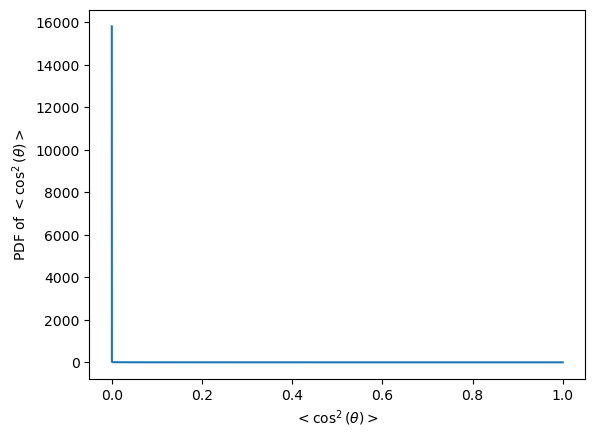

0.2928950786590576     got power, cos2theta, and pdf arrays
0.2933669090270996     x0 numerator for CL of 90 is 1.2815515655446004

0.2933919429779053     Now we calculate joint PDF between cos2theta and cavity power fluctuations by multiplying
0.2933979034423828     the PDF above with the normalized gaussian PDF of the cavity power fluctuations.

0.4154529571533203     joint pdf arrays made; joint_pdf_values.shape = (10, 500, 500)
0.4154829978942871     now plotting one of the joint pdf arrays


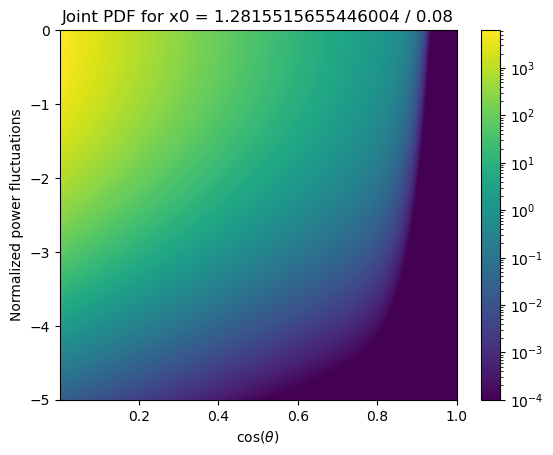

0.8990569114685059     now integrate the joint PDFs over the possible cos2theta values + get CDF arrays


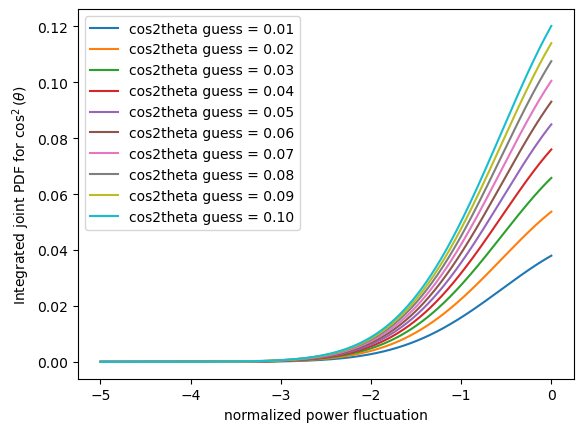

1.157303810119629     Integrate the curves above over power to calculate the CL for each guess of cos2theta
1.1573247909545898     Then we can plot the guesses versus their CLs and interpolate to find the CL we want.


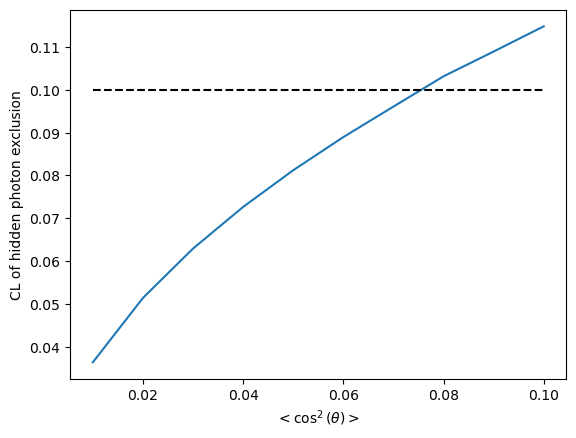

1.2878317832946777     Using interpolation, the calculated value of cos2theta is 0.07552853286000766 for a CL of 90 %


In [2]:
cos2theta_pdf_function = get_instantaneous_cos2theta_pdf

# calculate the 90% confidence limit value of cos2theta
test_value_90 = find_cos2theta_from_joint_pdf(cos2theta_pdf_function, CL_percentage=90, 
                                              start_test_value=0.01, end_test_value=0.1, make_plots=True)

If you want to specifically test out the value calculated here, there's a function to plug in this value and get out all the respective plots!

1.297286033630371     current integral = 1.0000761718700653 when starting exponent = -9
1.297548770904541     The PDF of cos2theta over the range 0.000000 to 1.000000 integrates to 1.000076
1.2975969314575195     trying out the following values for the x0 numerator: [1.28155157]
1.2982690334320068     trying out the following values for the x0 denominator: [0.07552853]


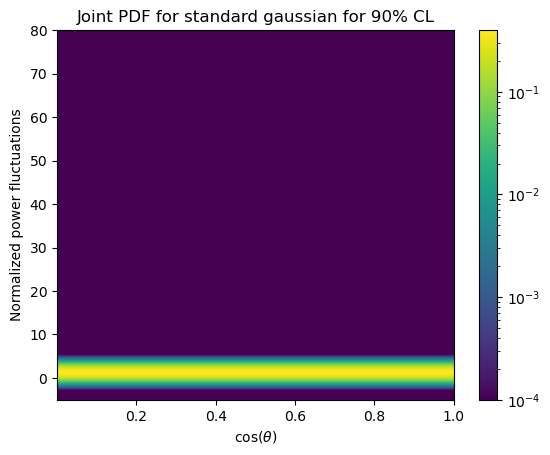

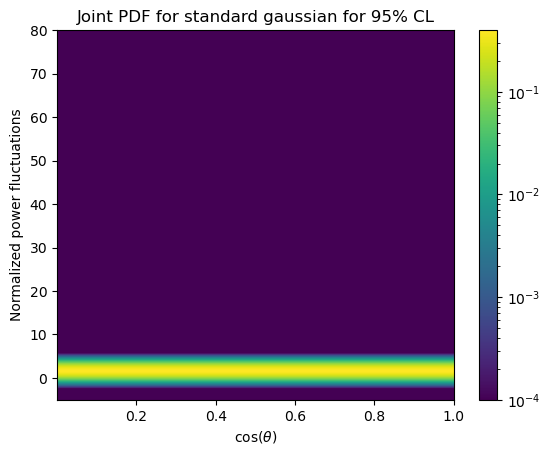

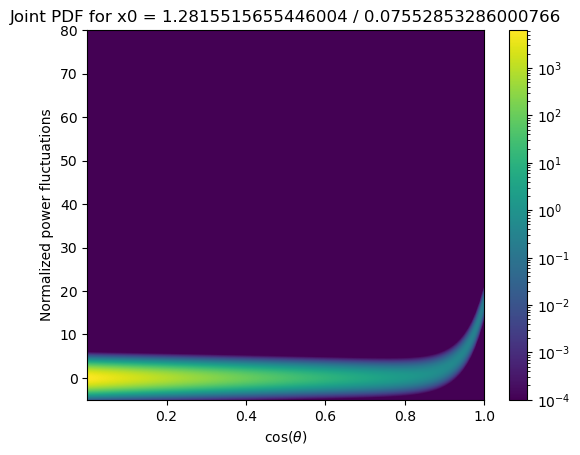

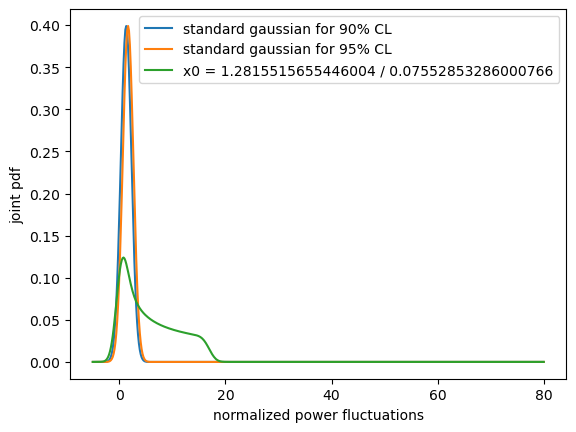

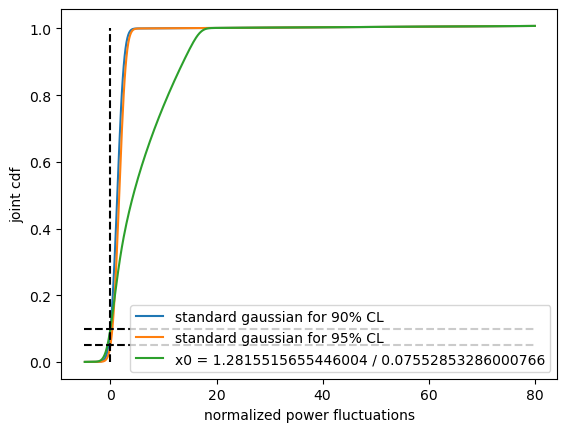

In [3]:
# The value of x0 in the gaussian PDF equation above can be calculated in Python.
x0 = norm.ppf(.90)

# Therefore, we can now calculate the joint PDF values from the code package.
joint_pdf, cos, x, labels_for_each_curve = make_joint_pdf_arrays(x0, test_value_90, cos2theta_pdf_function)

# and now finally, plot all the intermediate steps!
make_joint_pdf_plots(joint_pdf, cos, x, labels_for_each_curve)

## Longer Measurements!!!
### Let's walk through the steps to get the time-averaged dot product value $\langle\cos^2\theta\rangle_{90\%}$ for measurements that last much longer than an hour. In March 2023 the only multi-hour measurement I know of is from [the CAPP experiment](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.126.191802).

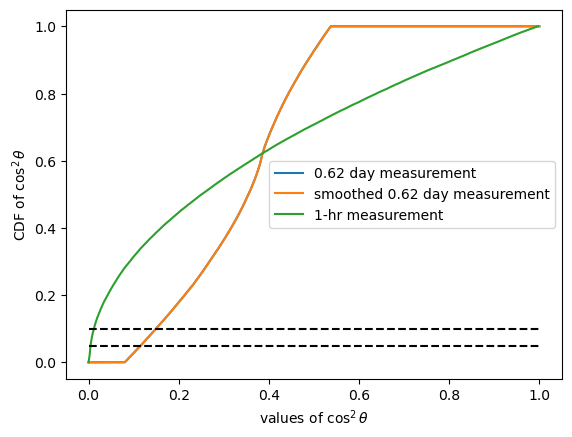

104.96883988380432     integral of pdf of cos2theta is 1.0034339110785775


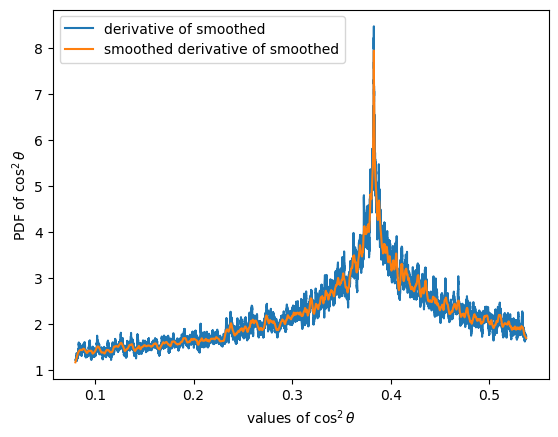

In [4]:
# First, type in the things we need to know about this experiment: how long it took and where on Earth it is!
time_days = 15 / 24  # 15 hours
latitude = 36.35  # Daejeon, Republic of Korea

# Then let's calculate the time-averaged PDF using the code for longer-term measurements!
cos2theta_pdf_function = get_time_averaged_cos2th_pdf_function(time_days, latitude, make_plots=True)

105.43732786178589     current integral = 1.0077050043202267 when using linspace
105.43807482719421     The PDF of cos2theta over the range 0.000000 to 1.000000 integrates to 1.007705
105.43810486793518     Plotting the PDF of cos2theta (the random variable) over all its possible values.


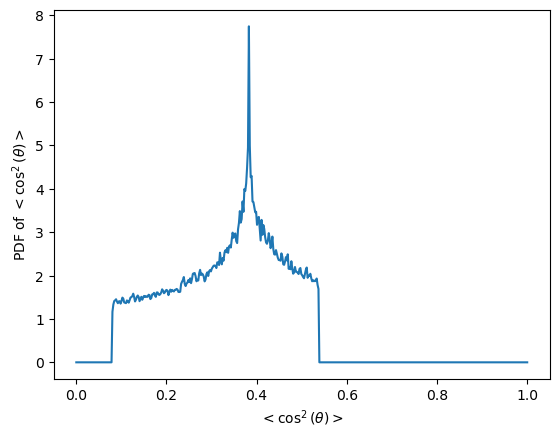

105.77386593818665     got power, cos2theta, and pdf arrays
105.77439379692078     x0 numerator for CL of 90 is 1.2815515655446004

105.77442789077759     Now we calculate joint PDF between cos2theta and cavity power fluctuations by multiplying
105.7744369506836     the PDF above with the normalized gaussian PDF of the cavity power fluctuations.

106.08670687675476     joint pdf arrays made; joint_pdf_values.shape = (10, 500, 500)
106.08722114562988     now plotting one of the joint pdf arrays


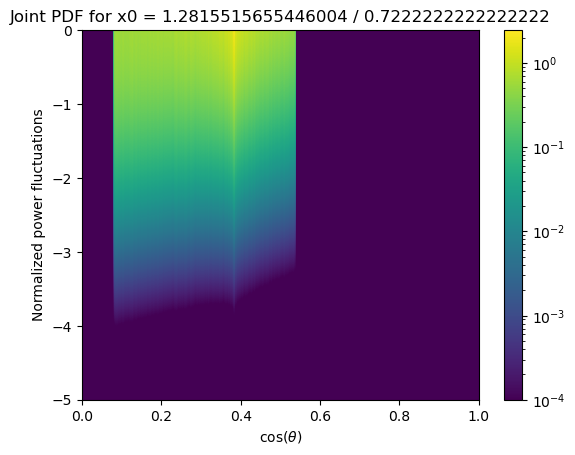

107.69204092025757     now integrate the joint PDFs over the possible cos2theta values + get CDF arrays


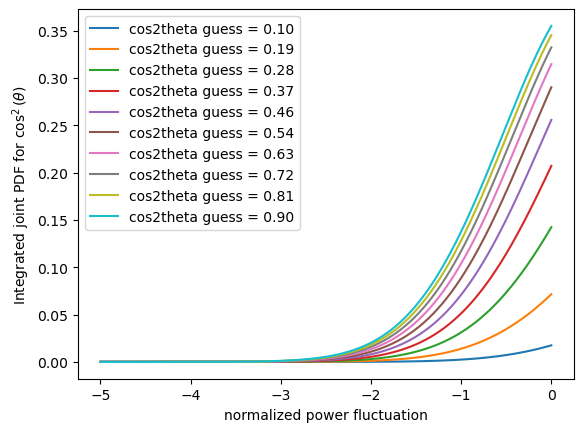

108.2756118774414     Integrate the curves above over power to calculate the CL for each guess of cos2theta
108.2756519317627     Then we can plot the guesses versus their CLs and interpolate to find the CL we want.


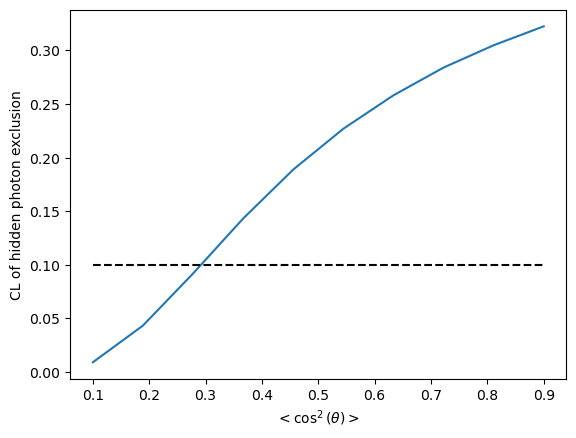

108.6221809387207     Using interpolation, the calculated value of cos2theta is 0.29191709369510377 for a CL of 90 %


In [5]:
# Finally, we once again calculate the 90% CL value of <cos2theta>.
test_value = find_cos2theta_from_joint_pdf(cos2theta_pdf_function, CL_percentage=90, 
                                           start_test_value=0.1, end_test_value=0.9, make_plots=True)

## Now that you have the value of $\langle\cos^2\theta\rangle_{90\%}$, you can plug it into the axion-hidden photon exclusion conversion equation:

$$\frac{\chi}{g_{a\gamma\gamma}}=\frac{B_0}{m_{\gamma'} \sqrt{\langle\cos^2{\theta}\rangle}_{90\%}} \sqrt{\frac{\rho_a}{\rho_{\gamma'}}}$$

Make sure you also keep tabs on the other parameters in this scaling!

# If all you want to do is use the already converted haloscope exclusions, you can do that too!

Dark photon exclusions for polarized and unpolarized dark photons converted from axion measurements are each in a .mat file in the **data** directory. Each case has its own .mat file.

Keys for both of the data files are 'RBF_ueV', 'RBF_chi', 'UF_ueV', 'UF_chi', 'HAYSTAC_ueV', 'HAYSTAC_chi', 'ADMX_ueV', 'ADMX_chi', 'CAPP_ueV', and 'CAPP_chi'.

**NOTE: Both UF and RBF refer to experiments that used "magnetic veto" during their measurements, which means they specifically skipped reporting any signal that stayed on when their haloscope magnet was turned off. This means that their data does not actually have any sensitivity to the hidden photon! So their data is only here for instructional reasons, not science reasons!!!**

To use the .mat file format in Python, use a script like the following:

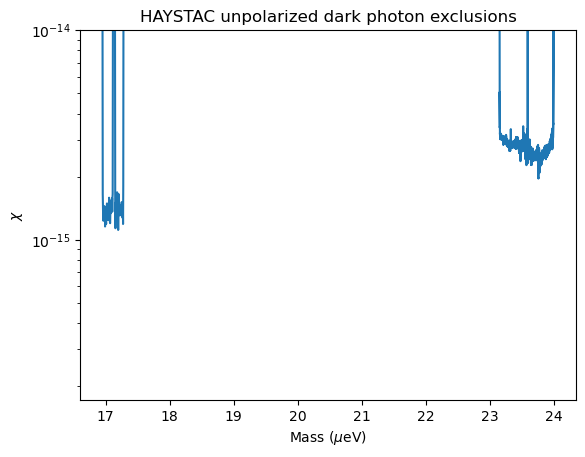

In [6]:
mat_file = loadmat('../data/haloscope_exclusions_unpolarized.mat')
masses_in_ueV = mat_file['HAYSTAC_ueV'][0]
chi_exclusion = mat_file['HAYSTAC_chi'][0]

plt.figure()
plt.semilogy(masses_in_ueV, chi_exclusion)
plt.xlabel('Mass ($\mu$eV)')
plt.ylabel('$\chi$')
plt.title('HAYSTAC unpolarized dark photon exclusions')
plt.ylim(top=1e-14)
plt.show()

Citations for the data in the .mat files are at https://zenodo.org/record/5550511